<a href="https://colab.research.google.com/github/Krishna8483/Hostel-Management-System/blob/master/Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn .preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')

In [3]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.228699
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.400017
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.316193


In [4]:
#Get the no of columns and rows
df.shape

(2003, 6)

Text(0, 0.5, 'Close Price USD ($)')

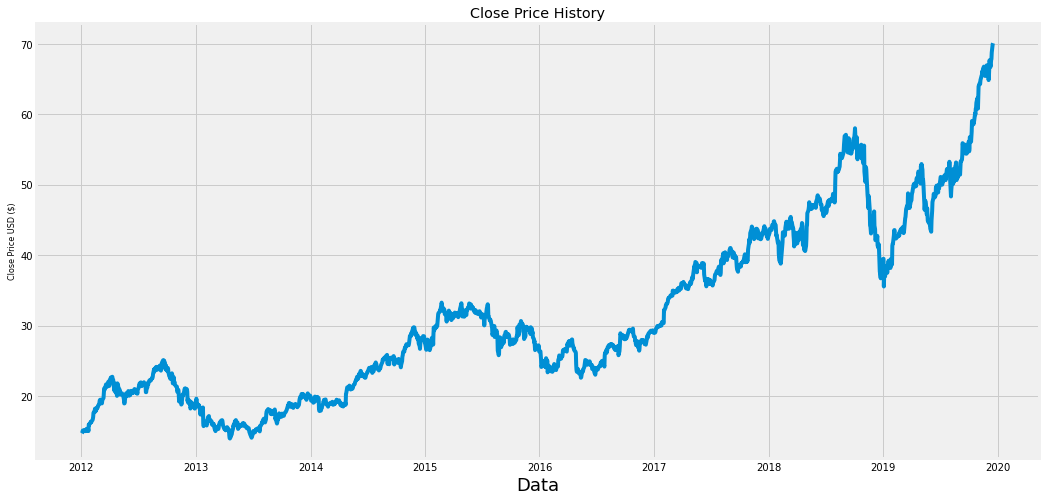

In [5]:
#Visualise the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=8)

In [6]:
#CREATE  a new dataframe with onlu one column
data=df.filter(['Close'])
#convert the dataframe into a numpy array
df=data.values

#Get the no of rows to train the model
training_data_len=math.ceil(len(df)*.8)

In [7]:
training_data_len

1603

In [8]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaler_data=scaler.fit_transform(df)
scaler_data

array([[0.01316509],
       [0.01457064],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [9]:
#create the training data set
#create the scaled training data set
train_data=scaler_data[0:training_data_len,:]
#split the data into x_train and y_train
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457064, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862193, 0.02173194,
       0.02453668, 0.02367172, 0.01893356, 0.02345548, 0.01900352,
       0.03569838, 0.03440731, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814046, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661397,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632775, 0.09835024, 0.10269405, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701233, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [10]:
#conver the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)


In [11]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1543, 60, 1)

In [12]:
#Buld the LSTM MODEL
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')
    


In [14]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1543/1543 [==============================] - 31s 20ms/step - loss: 8.6219e-04


In [19]:
#create the testing dataset
#create a new array containing scaled values from index 1543 to 2003
test_data=scaler_data[training_data_len -60:,:]
#create the datasets x_test and y_test
x_test=[]
y_test=df[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [20]:
#convert the data to a numpy array
x_test=np.array(x_test)

In [21]:
#Reshape the data           #rows          #columns       #features
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
#Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [25]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.0004716777801514

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


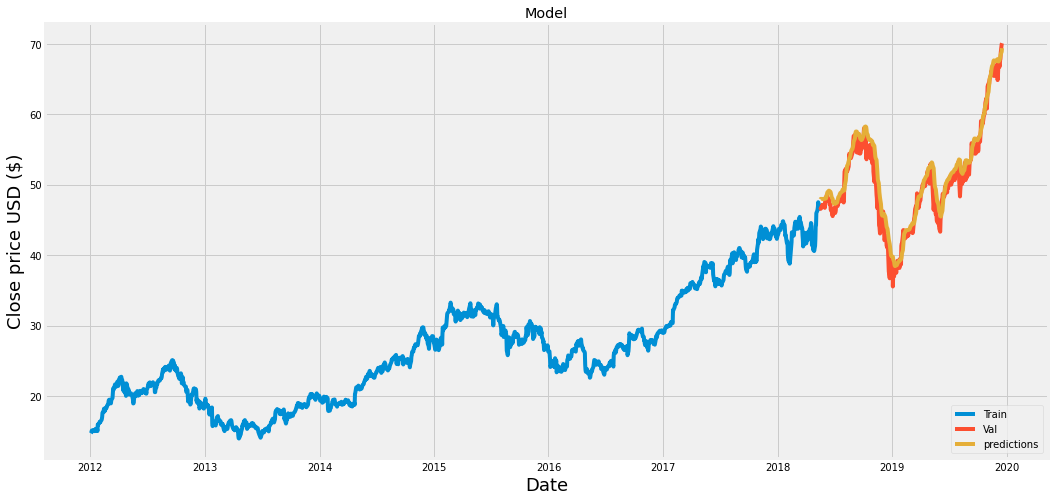

In [29]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
#viuslaize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()

In [30]:
#show the actual and predicted prices
valid

,Close,predictions
Date,,
2018-05-17,46.747501,47.920788
2018-05-18,46.577499,47.988342
2018-05-21,46.907501,47.981026
2018-05-22,46.790001,47.973904
2018-05-23,47.090000,47.951935
...,...,...
2019-12-11,67.692497,68.036880
2019-12-12,67.864998,68.278786
2019-12-13,68.787498,68.539314


In [32]:
#Get the quote
apple_quote=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
#create a new frame
new_df=apple_quote.filter(['Close'])
#Get the last 60 days closing price
last_60_days=new_df[-60:].values
#Scale the data to be values between 0 to 1
last_60_days_scaled=scaler.transform(last_60_days)
#create an emplty list
x_test=[]
#Append the past 60 days
x_test.append(last_60_days_scaled)
#convert the x_test data to a numpy array
x_test=np.array(x_test)
#Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#Get the predicted scaled price
pred_price=model.predict(x_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[69.915245]]


In [34]:
apple_quote2=web.DataReader('AAPL',data_source='yahoo',start='2019-12-18',end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
